In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math 
from sklearn.metrics import mean_squared_error

In [115]:
def plot_pred(test, pred):
    plt.plot(test, color='red', label='Real Congestion')
    plt.plot(pred, color='blue', label='Predicted Congestion')
    plt.title('car Congestion')
    plt.xlabel('Time')
    plt.ylabel('car Congetion')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))

In [116]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week 5 Mini Project\\Datasets\Train.csv')
df

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [117]:
df.dtypes

row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
dtype: object

In [118]:
df.shape

(848835, 6)

In [119]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

row_id                 int64
time          datetime64[ns]
x                      int64
y                      int64
direction             object
congestion             int64
dtype: object

In [120]:
df['day'] = df['time'].dt.day
df

,row_id,time,x,y,direction,congestion,day
0,0,1991-04-01 00:00:00,0,0,EB,70,1
1,1,1991-04-01 00:00:00,0,0,NB,49,1
2,2,1991-04-01 00:00:00,0,0,SB,24,1
3,3,1991-04-01 00:00:00,0,1,EB,18,1
4,4,1991-04-01 00:00:00,0,1,NB,60,1
...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,30
848831,848831,1991-09-30 11:40:00,2,3,NE,28,30
848832,848832,1991-09-30 11:40:00,2,3,SB,68,30
848833,848833,1991-09-30 11:40:00,2,3,SW,17,30


In [121]:
df.drop('row_id', axis=1, inplace=True)
df

,time,x,y,direction,congestion,day
0,1991-04-01 00:00:00,0,0,EB,70,1
1,1991-04-01 00:00:00,0,0,NB,49,1
2,1991-04-01 00:00:00,0,0,SB,24,1
3,1991-04-01 00:00:00,0,1,EB,18,1
4,1991-04-01 00:00:00,0,1,NB,60,1
...,...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54,30
848831,1991-09-30 11:40:00,2,3,NE,28,30
848832,1991-09-30 11:40:00,2,3,SB,68,30
848833,1991-09-30 11:40:00,2,3,SW,17,30


In [122]:
group_dic = df.groupby(['direction']).agg({'congestion': 'mean'})
group_dic

,congestion
direction,
EB,49.571171
NB,51.853913
NE,39.971251
NW,27.188912
SB,53.716332
SE,34.859637
SW,42.019538
WB,49.842289


In [123]:
df = df[df['direction'] == 'SB']
df

,time,x,y,direction,congestion,day
2,1991-04-01 00:00:00,0,0,SB,24,1
5,1991-04-01 00:00:00,0,1,SB,58,1
9,1991-04-01 00:00:00,0,2,SB,46,1
14,1991-04-01 00:00:00,0,3,SB,49,1
20,1991-04-01 00:00:00,1,0,SB,44,1
...,...,...,...,...,...,...
848806,1991-09-30 11:40:00,1,3,SB,66,30
848811,1991-09-30 11:40:00,2,0,SB,45,30
848817,1991-09-30 11:40:00,2,1,SB,37,30
848825,1991-09-30 11:40:00,2,2,SB,64,30


In [124]:
df.drop(['x','y','direction'],axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_16764\716129739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['x','y','direction'],axis=1, inplace=True)


,time,congestion,day
2,1991-04-01 00:00:00,24,1
5,1991-04-01 00:00:00,58,1
9,1991-04-01 00:00:00,46,1
14,1991-04-01 00:00:00,49,1
20,1991-04-01 00:00:00,44,1
...,...,...,...
848806,1991-09-30 11:40:00,66,30
848811,1991-09-30 11:40:00,45,30
848817,1991-09-30 11:40:00,37,30
848825,1991-09-30 11:40:00,64,30


In [125]:
df['month'] = df['time'].dt.month
df['hour'] = df['time'].dt.hour
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_16764\3052242136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].dt.month
C:\Users\abo_O\AppData\Local\Temp\ipykernel_16764\3052242136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].dt.hour


,time,congestion,day,month,hour
2,1991-04-01 00:00:00,24,1,4,0
5,1991-04-01 00:00:00,58,1,4,0
9,1991-04-01 00:00:00,46,1,4,0
14,1991-04-01 00:00:00,49,1,4,0
20,1991-04-01 00:00:00,44,1,4,0
...,...,...,...,...,...
848806,1991-09-30 11:40:00,66,30,9,11
848811,1991-09-30 11:40:00,45,30,9,11
848817,1991-09-30 11:40:00,37,30,9,11
848825,1991-09-30 11:40:00,64,30,9,11


In [126]:
df.drop('time', axis=1, inplace=True)

C:\Users\abo_O\AppData\Local\Temp\ipykernel_16764\2964713450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('time', axis=1, inplace=True)


In [127]:
n_df = df.groupby(['day', 'month', 'hour']).sum().reset_index()

# Display the result
n_df

,day,month,hour,congestion
0,1,4,0,1544
1,1,4,1,1755
2,1,4,2,2007
3,1,4,3,1471
4,1,4,4,1498
...,...,...,...,...
4361,31,8,19,2083
4362,31,8,20,1957
4363,31,8,21,2010
4364,31,8,22,1902


In [128]:
df = n_df

In [129]:
train_size = int(len(df) * 0.8)
train_size

3492

In [130]:
train = df[:train_size].iloc[:,3:4].values
test = df[train_size:].iloc[:,3:4].values

train.shape, test.shape, train

((3492, 1),
 (874, 1),
 array([[1544],
        [1755],
        [2007],
        ...,
        [2017],
        [1901],
        [1774]], dtype=int64))

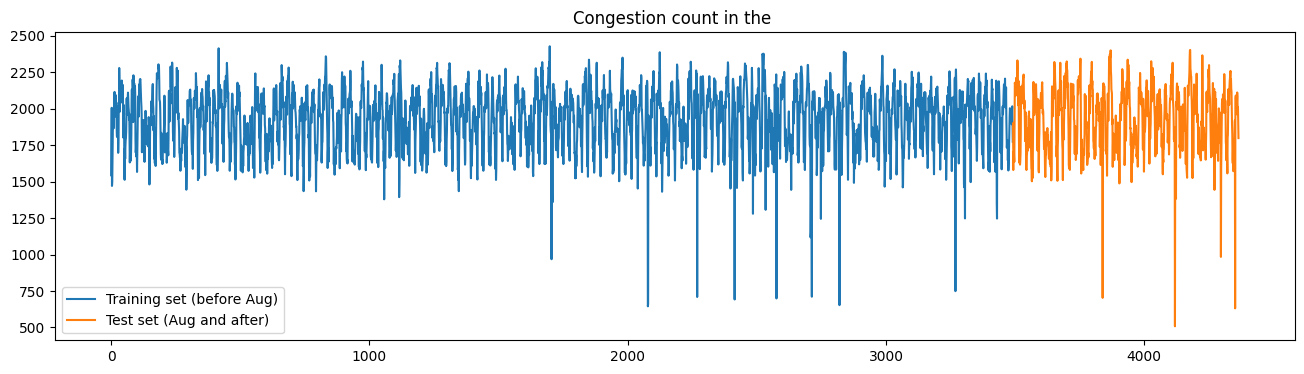

In [131]:
df['congestion'][:train_size].plot(figsize=(16,4), legend=True)
df['congestion'][train_size:].plot(figsize=(16,4), legend=True)
plt.legend(['Training set (before Aug)', 'Test set (Aug and after)'])
plt.title('Congestion count in the ')
plt.show()

In [132]:
df.dtypes

day           int32
month         int32
hour          int32
congestion    int64
dtype: object

In [133]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [134]:
len(train_scaled)

3492

In [136]:
X_train = []
y_train = []
for i in range(7,len(train_scaled)):
    X_train.append(train_scaled[i-7:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [137]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [138]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2330
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0153
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0152
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0162
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0136
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0144
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0127
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0139
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0121
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0134
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0125
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0110
Epoch 16/50
55/5

In [140]:
dataset_total = pd.concat((df["congestion"][:train_size], df["congestion"][train_size:]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test)-7:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [141]:
len(test)

874

In [163]:
X_test = []
for i in range(7,881):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_cong = model.predict(X_test)
pred_cong = scaler.inverse_transform(pred_cong)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


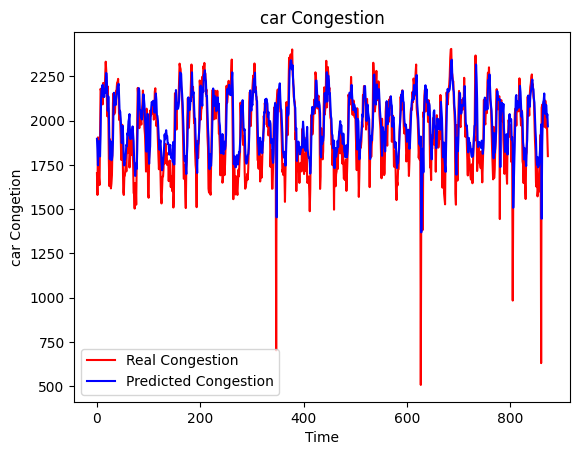

In [164]:
plot_pred(test, pred_cong)

In [165]:
return_rmse(test, pred_cong)

The root mean squared error is 158.16587201937065.


In [166]:
RGRU = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'),
    Dropout(0.2),
    GRU(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

RGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

RGRU.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 7, 50)          │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 7, 50)          │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 7, 50)          │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
RGRU.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.1295
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0141
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0131
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0141
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0138
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0130
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0128
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0122
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0121
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0117
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0116
Epoc

In [168]:
X_test = []
for i in range(7,881):
    X_test.append(inputs[i-7:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = RGRU.predict(X_test)
GRU_predicted_stock_price = scaler.inverse_transform(GRU_predicted_stock_price)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


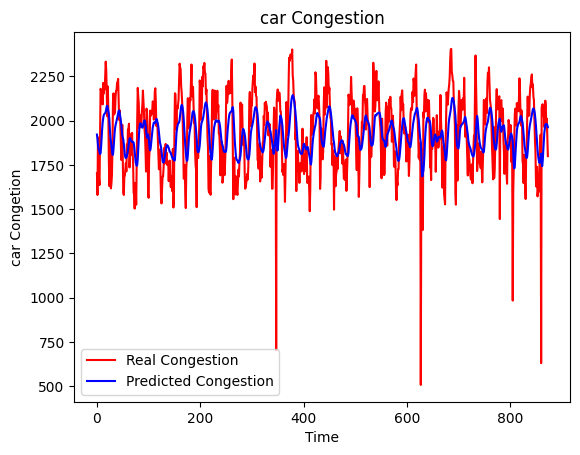

In [169]:
plot_pred(test, GRU_predicted_stock_price)

In [170]:
return_rmse(test, GRU_predicted_stock_price)

The root mean squared error is 188.77398610827345.
